#GLACINDIA Workshop
##Part 7: Time series analysis (Pandas) 2

Nikolay Koldunov

koldunovn@gmail.com

In [1]:
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


We are going to use data from [Indian Institute Of Tropical Meteorology](http://www.tropmet.res.in/Data%20Archival-51-Page). In particular [Longest Instrumental Rainfall Series of the Indian Regions (1813-2006)](http://www.tropmet.res.in/static_page.php?page_id=52) time series.

In [2]:
data = np.loadtxt("8-all_ind.txt", skiprows=2)

Data came in as a table with months and yearly averages as columns:

In [3]:
data

array([[ 1813. ,    10. ,    14.2, ...,    97.7,   840.6,   156.2],
       [ 1814. ,     9. ,    12.3, ...,    81.1,   837.3,    81.7],
       [ 1815. ,    18.5,    14.7, ...,    94.1,   895.5,   179.7],
       ..., 
       [ 2004. ,    18.4,     5.1, ...,   150.9,   807.2,   125.4],
       [ 2005. ,    20.7,    19.8, ...,   106.4,   909.4,   161.4],
       [ 2006. ,     5. ,     3.4, ...,   154.3,   927.8,   115.5]])

We actually need only 12 columns with months:

In [4]:
data.shape

(194, 18)

In [5]:
data[:,1:13].shape

(194, 12)

One way to make continuous time series is to flatten the array:

In [6]:
data_flat = data[:,1:13].flatten()

Now its one dimentional:

In [7]:
data_flat.shape

(2328,)

Let's now construct a pandas DataFrame.

We know the time range of the data, so we can create time array, that can be used as an index:

In [8]:
dates = pd.period_range('1813-01','2006-12', freq="M")

In [9]:
dates

<class 'pandas.tseries.period.PeriodIndex'>
[1813-01, ..., 2006-12]
Length: 2328, Freq: M

Now we can put together our data and index:

In [10]:
df = pd.DataFrame({'PRC':data_flat}, index=dates)

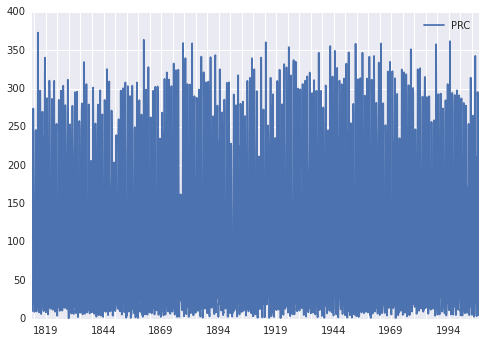

In [12]:
df.plot()

Now create yearly means:

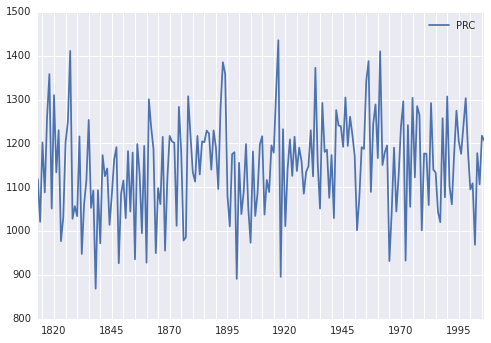

In [13]:
df.resample('A', how='sum').plot()

We actally have information about daily means in the original data. So we can compare out result: 

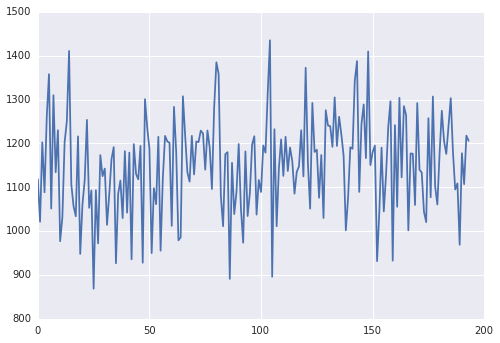

In [14]:
plot(data[:,13])

##Exersise

Extract data for JJAS period, put them in to pandas Data frame variable and plot.